# Setup

In [ ]:
pwd

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-1-gb32f67f Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 22.6/78.2 GB disk)


# Importing libraries -

In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images

# Extract the data -

In [ ]:
import zipfile

with zipfile.ZipFile("/home/data/somesh/autonomous.zip", 'r') as zip_file:
    zip_file.extractall("/home/data/somesh/yolov5/data/")

In [9]:
%mkdir /home/data/somesh/yolov5/output
%mkdir /home/data/somesh/yolov5/output/images
%mkdir /home/data/somesh/yolov5/output/labels

mkdir: cannot create directory ‘/home/data/somesh/ultralytics/output’: No such file or directory
mkdir: cannot create directory ‘/home/data/somesh/ultralytics/output/images’: No such file or directory
mkdir: cannot create directory ‘/home/data/somesh/ultralytics/output/labels’: No such file or directory


In [ ]:
import glob
import shutil
import os

for i in glob.glob("/home/data/somesh/yolov5/autonomous/*.txt"):
    shutil.copy(i, "/home/data/somesh/yolov5/output/labels/")

for i in glob.glob("/home/data/somesh/yolov5/autonomous/*.jpg"):
    shutil.copy(i, "/home/data/somesh/yolov5/output/images/")
    
shutil.rmtree("/home/data/somesh/yolov5/autonomous/")
os.remove("/home/data//somesh/yolov5/autonomous.zip")

# Splitting the data -

In [ ]:
!pip install split-folders
import splitfolders

splitfolders.ratio("/home/data/somesh/yolov5/output/", 
                   output="/home/data/somesh/yolov5/data/", ratio=(0.65,0.25,0.10))

shutil.rmtree("/home/data/somesh/yolov5/output/")

# Customizing the yaml file -

In [ ]:
%mv /home/data/somesh/yolov7/data/coco.yaml /home/data/somesh/yolov7/data/custom.yaml
%mv /home/data/somesh/yolov7/cfg/training/yolov7.yaml /home/data/somesh/yolov7/cfg/training/yolov7-custom.yaml

In [ ]:
%%writetemplate /home/data/somesh/yolov5/data/coco.yaml

# Checking available GPU's -

In [ ]:
!nvidia-smi

# Training -

In [6]:
%%time
!python train.py --img 416 --batch 32 --epochs 200 --data coco.yaml --weights /home/data/somesh/yolov5/yolov5l.pt  --cache

train: weights=/home/data/somesh/yolov5/yolov5l.pt, cfg=, data=coco.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 25 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.8 torch-1.13.1+cu117 CUDA:0 (NVIDIA A100-SXM4-40GB, 40370MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.

val: Caching images (1.7GB ram): 100%|██████████| 5560/5560 [00:04<00:00, 1295.2

AutoAnchor: 4.10 anchors/target, 1.000 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to runs/train/exp4/labels.jpg... 
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/train/exp4
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/199      8.06G    0.06746    0.03682    0.01804        194        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639       0.61      0.352      0.327      0.141

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      1/199      9.64G    0.05134    0.03154   0.008054        193        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639      0.723  

     48/199      9.64G    0.03194    0.02513   0.002536        198        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639      0.752      0.675      0.689        0.4

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/199      9.64G    0.03199    0.02526   0.002538        152        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639      0.742       0.68       0.69        0.4

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     50/199      9.64G    0.03179    0.02506   0.002524        271        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639      0.744      0.678      0.689        0.4

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     51/19

     73/199      9.64G    0.03052     0.0238   0.002299        176        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639      0.751      0.692      0.696      0.409

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/199      9.64G    0.03052    0.02402   0.002236        174        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639       0.75       0.69      0.696      0.409

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     75/199      9.64G    0.03052    0.02383   0.002288        209        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639       0.75      0.691      0.697      0.409

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     76/19

     98/199      9.64G    0.02931    0.02289   0.002101        178        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639      0.753      0.695      0.699      0.412

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/199      9.64G    0.02912    0.02277   0.002035        152        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639      0.754      0.694      0.699      0.413

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    100/199      9.64G    0.02926    0.02259   0.002097        195        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639      0.754      0.695      0.699      0.413

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    101/19

    123/199      9.64G    0.02798    0.02145   0.001923        218        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639      0.756      0.697      0.699      0.415

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/199      9.64G    0.02788    0.02159   0.001867        145        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639      0.756      0.697      0.699      0.415

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    125/199      9.64G    0.02786    0.02153   0.001891        247        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639      0.757      0.696        0.7      0.416

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    126/19

    148/199      9.64G    0.02637    0.02021   0.001711        193        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639      0.756      0.702      0.701       0.42

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/199      9.64G    0.02652     0.0204   0.001773        197        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639      0.756      0.701      0.702       0.42

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    150/199      9.64G    0.02641    0.02017   0.001769        216        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639      0.757      0.701      0.702       0.42

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    151/19

    173/199      9.64G     0.0247    0.01878   0.001604        189        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639       0.76      0.705      0.704      0.425

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/199      9.64G    0.02467    0.01866   0.001632        202        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639      0.761      0.705      0.704      0.425

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    175/199      9.64G    0.02447    0.01868   0.001597        187        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639      0.762      0.705      0.704      0.425

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    176/19

    198/199      9.64G    0.02279    0.01726   0.001456        210        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639      0.771      0.701      0.704      0.431

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/199      9.64G    0.02273     0.0173   0.001458        275        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all       5560      34639      0.771      0.701      0.703      0.431

200 epochs completed in 6.695 hours.
Optimizer stripped from runs/train/exp4/weights/last.pt, 92.7MB
Optimizer stripped from runs/train/exp4/weights/best.pt, 92.7MB

Validating runs/train/exp4/weights/best.pt...
Fusing layers... 
Model summary: 267 layers, 46129818 parameters, 0 gradients, 107.7 GFLOPs
                 Class     Images  Instances          P          R      mAP50   
                   all       5560

# Validating -

In [8]:
!python val.py --weights runs/train/exp4/weights/best.pt --data coco.yaml --img 416 --half

val: data=/home/data/somesh/yolov5/data/coco.yaml, weights=['runs/train/exp4/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.8 torch-1.13.1+cu117 CUDA:0 (NVIDIA A100-SXM4-40GB, 40370MiB)

Fusing layers... 
Model summary: 267 layers, 46129818 parameters, 0 gradients, 107.7 GFLOPs
val: Scanning /home/data/somesh/yolov7/data/autonomous/val/labels.cache... 4773 
val: WARNING ⚠️ /home/data/somesh/yolov7/data/autonomous/val/images/1478020944220115330.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /home/data/somesh/yolov7/data/autonomous/val/images/1478731922955810314.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /home/data/somesh/yolov7/data/autonomous/val/images/1478899003861573476.jpg: 1 duplicate la

# Detection -

In [7]:
!python detect.py --weights runs/train/exp4/weights/best.pt --img 640 --conf 0.25 --source data/images

detect: weights=['runs/train/exp4/weights/best.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.8 torch-1.13.1+cu117 CUDA:0 (NVIDIA A100-SXM4-40GB, 40370MiB)

Fusing layers... 
Model summary: 267 layers, 46129818 parameters, 0 gradients, 107.7 GFLOPs
image 1/6 /home/data/somesh/yolov5/data/images/1479505119922335522.jpg: 416x640 6 cars, 1 truck, 37.7ms
image 2/6 /home/data/somesh/yolov5/data/images/1479505182928061315.jpg: 416x640 16 cars, 2 pedestrians, 17.8ms
image 3/6 /home/data/somesh/yolov5/data/images/1479505730961910134.jpg: 416x640 7 cars, 17.8ms
image 4/6 /home/data/somesh/y

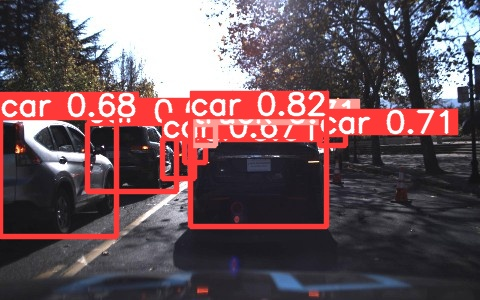

In [12]:
from IPython.display import Image, display
display(Image(filename="/home/data/somesh/yolov5/runs/detect/exp3/1479505119922335522.jpg"))

In [ ]:
!python detect.py --weights runs/train/exp4/weights/best.pt --img 640 --conf 0.25 --source data/images/Driving_Downtown_-_New_York_City_4K_-_USA\(360p\)_1.mp4

In [ ]:
from IPython.display import Video

Video("runs/detect/exp4/Driving_Downtown_-_New_York_City_4K_-_USA(360p)_1.mp4", embed=True)

In [ ]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'ClearML' #@param ['ClearML', 'Comet', 'TensorBoard']

if logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

# Visualization -

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

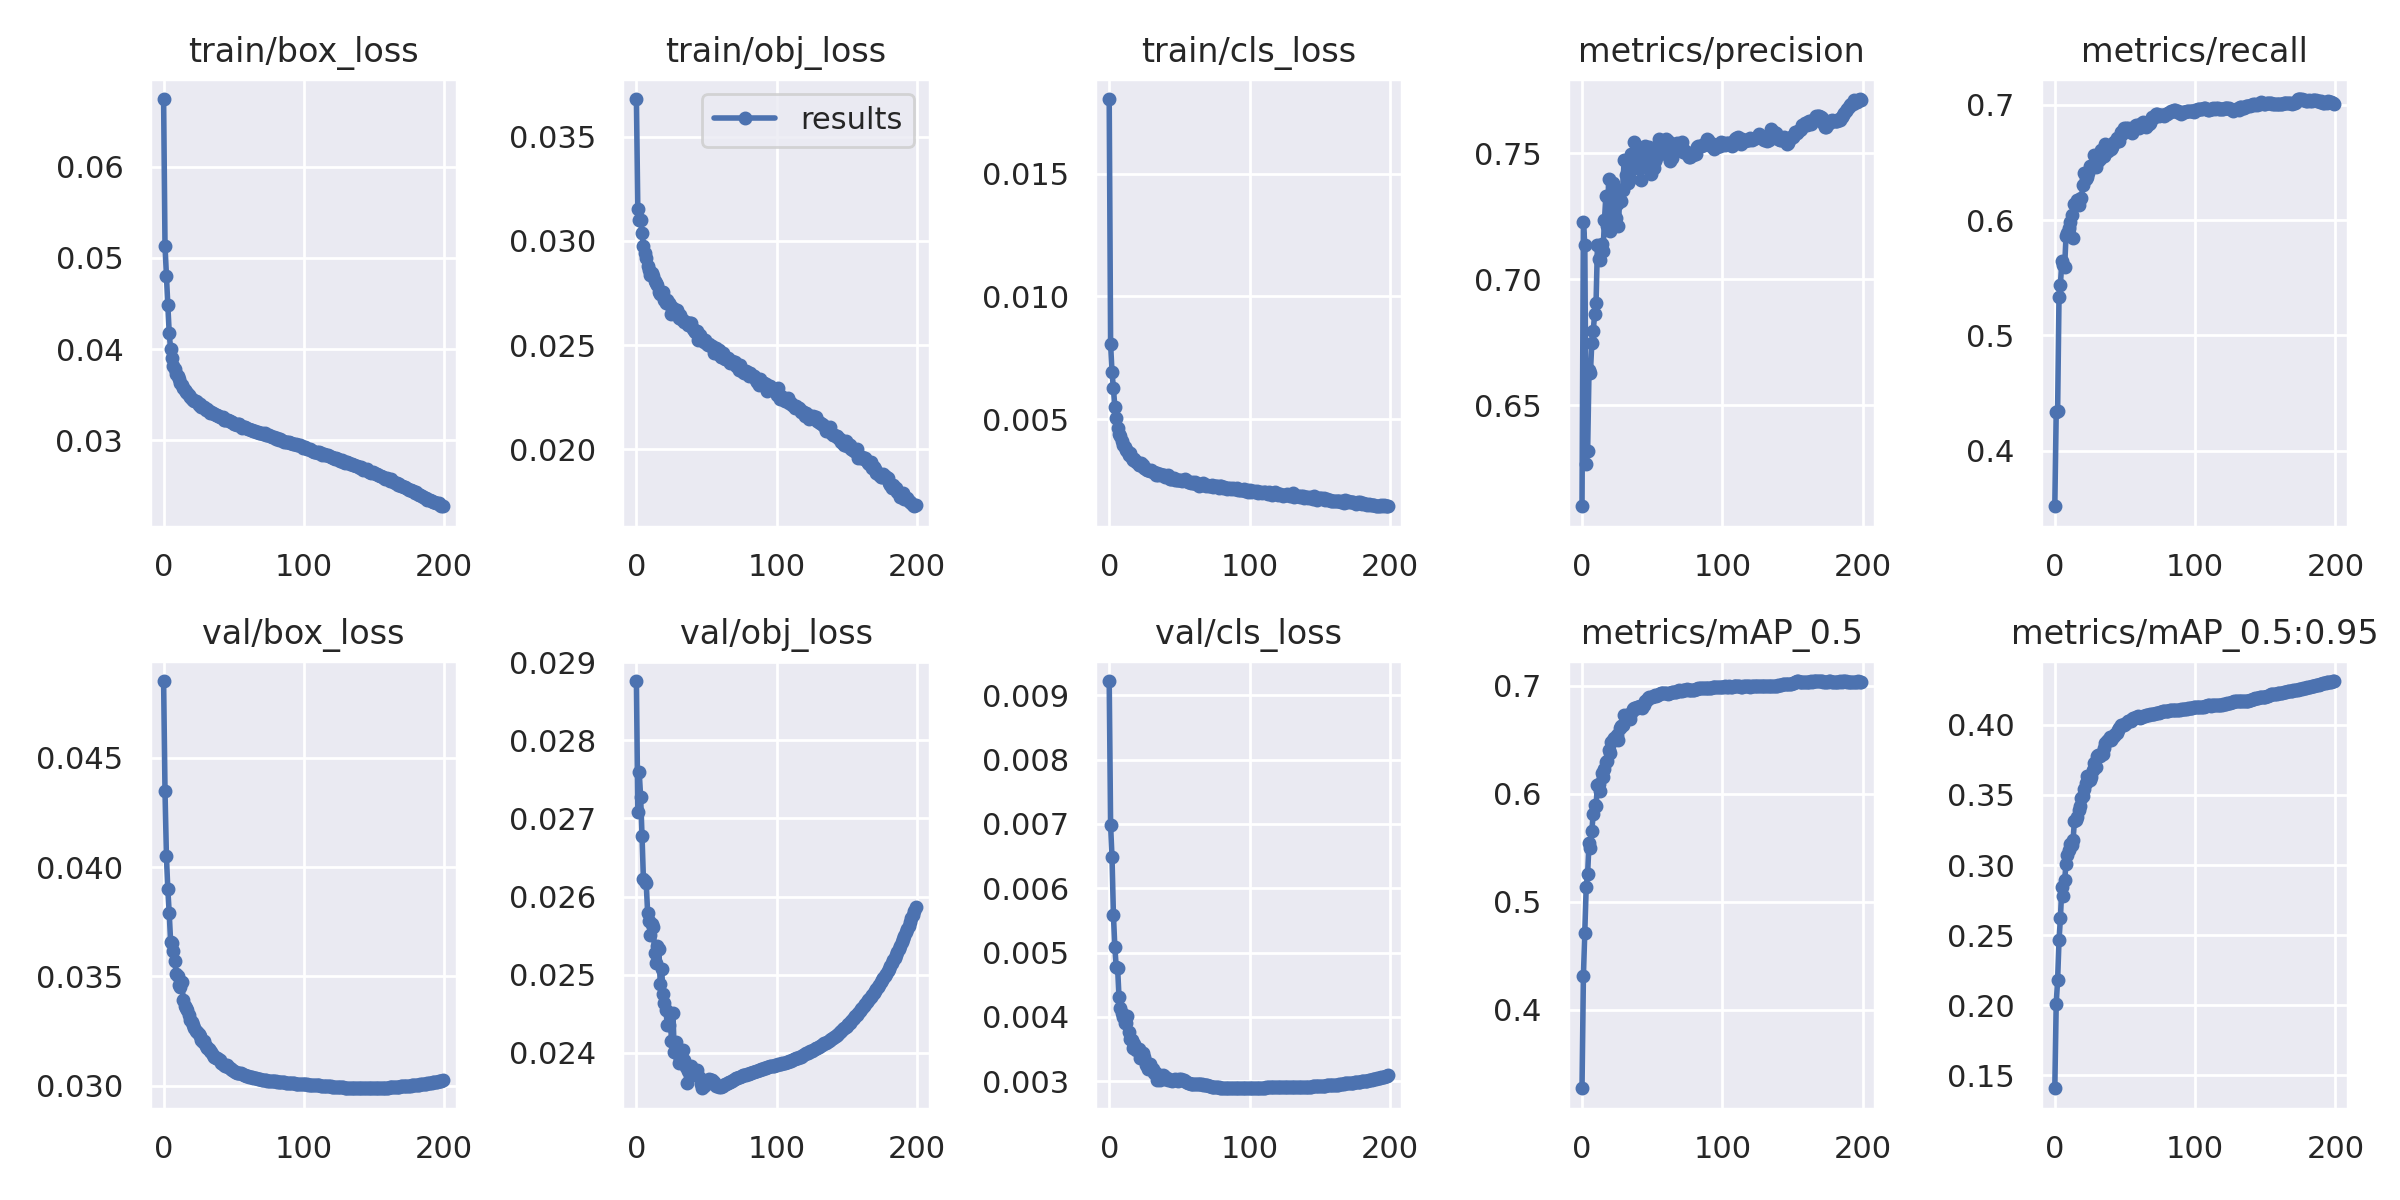

In [11]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from IPython.display import Image, clear_output  # to display images
Image(filename='/home/data/somesh/yolov5/runs/train/exp4/results.png', width=1000)  # view results.png